# Introduction

In this project we were given a dataset consisting of statements and their emotions, our goal is to use different classifiers and prepreocessing methods from NLP to create models that are able to predict a sentence's associated emotion.

## Importing the Dataset

We are importing our data from the res directory where the Emotions.csv and Testingdata.csv are located.

They are a collection of frases similar to "tweets" and have been classified according to their associated emotion ("joy", "fear" or "anger").

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd
data_set_path = "../res/Emotions.csv"
testing_set_path = "../res/Testingdata.csv"
dataset = pd.read_csv(data_set_path, header=0, sep=",", names=["Statement", "Emotion"], encoding='cp1252')
testset = pd.read_csv(testing_set_path, header=0, sep=",", names=["Statement", "Emotion"], encoding='cp1252')
dataset.head()

,Statement,Emotion
0,How the fu*k! Who the heck! moved my fridge!.....,anger
1,So my Indian Uber driver just called someone t...,anger
2,I asked for my parcel to be delivered to a pic...,anger
3,so ef whichever butt wipe pulled the fire alar...,anger
4,"Don't join they put the phone down on you, tal...",anger


If you executed the last code block the program should show the first entries of the training dataset that we get from importing Emotions.csv.

The following line of code displays some details obout the dataset we just imported.

In [117]:
dataset.describe()

,Statement,Emotion
count,2827,2827
unique,2772,3
top,Watch this amazing live.ly broadcast by #music...,fear
freq,26,1147


# Preprocessing

To solve this NLP problem we will employ some stages of preprocessing on our data, namely Steaming and Tokenization.
We then choose between two major preprocessing algorithms that we expected may give different results: BoW (Bag of Words) and TF-IDF (Term Frequency - Inverse Document Frequency)


### Steaming and Tokenization

In order ease the amount of processing the program must do we can apply some transformations to the text such as removing punctuation and other symbols, turn it all to lowercase, separating the text into tokens (separate by words), and removing stopwords (such as "the", "a", etc.).

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
ps = PorterStemmer()
for i in range(0, dataset['Statement'].size):
    # get review and remove non alpha chars
    review = re.sub('[^a-zA-Z]', ' ', dataset['Statement'][i])
    # to lower-case
    review = review.lower()
    # split into tokens, apply stemming and remove stop words
    review = ' '.join([ps.stem(w) for w in review.split() if not w in set(stopwords.words('english'))])
    corpus.append(review)
# print(corpus)

The following code shows us a visual representation of the frequency in which each word present in the dataset appears.

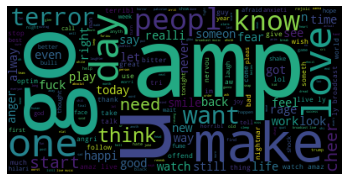

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(" ".join(corpus))

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The generated graph shows us the most predominant words in our dataset as bigger than the rest.

# Two different approaches

Next we have implemented two different ways in which the rest of the preprocessing can be achieved __BoW__ and __TF-IDF__.
In order to test both approaches we ask you that you run the code blocks of either one or the other chapter and jump to the algorithm section.
You can come back latter and try the other.

## Bag of Words

The BoW algorithm starts by creating a matrix with a slot for every word in the dataset. It then counts, for each sentece, how many of those words it has. This allows it to compare how close 2 sentences are by how similar their matrix representations are.

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

print(X.shape)

(2827, 5434)


In [ ]:
# print(vectorizer.get_feature_names())

The following piece of code gives us a peak into that matrix representation. Since the matrix is constructed for every word in the dataset most of the cells are at 0.

In [12]:

df_bow_sklearn = pd.DataFrame(X,columns=vectorizer.get_feature_names())
df_bow_sklearn.head()

c:\Users\Francisco\Anaconda3\envs\FEUP-IA_NLP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaron,aateam,ab,abbi,aber,aberdeen,abhijit,abil,...,zephaniah,zero,zeth,zika,zilch,zionist,zombi,zone,zooland,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF

This algorithm calculates 2 terms:

 - TF - that is the frequency in which a word appears in a document (a tweet in our case)
 - IDF - logarithm of the inverse of the frequency in which the word appears in the whole corpus (the collection of all documents)
 By multiplying these two terms you get the TF-IDF that gets you a value of the frequency of each word in different sentences but corrects for their overall frequency so that words like "that", "of" and such are not overrepresented.

In [104]:

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

'''

tfidf = TfidfVectorizer(use_idf=True, stop_words='english')
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X)
print(X_train)
''IdfTransformer = TfidfTransformer(use_idf=True)
countVectorizer = CountVectorizer()
wordCount = countVectorizer.fit_transform(dataset['Statement'])
X = tfIdfTransformer.fit_transform(wordCount)
''' 
tfVectorizer = CountVectorizer()
X = tfVectorizer.fit_transform(dataset['Statement'])
print(X.shape)

(2827, 7035)


# Algorithms

Now that we have a workable dataset we can experiment with some different algorithms to help us classify what type of emotion is associated with our test data.
First lets separate our dataset into training and validation sets so that we can train our models. Latter we will try it against the test dataset and compare results.

To do that start by running the code under __Dataset Distribution__ and similar to how we did in the __Preprocessing__ section run only the code blocks of an algorithm section at a time before going to __Performance Testing__.


## Dataset Distribution

In [ ]:
from sklearn.model_selection import train_test_split
y = dataset['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("\nLabel distribution in the training set:")
print(y_train.value_counts())

print("\nLabel distribution in the test set:")
print(y_test.value_counts())

## Naïve Bayes

TODO - describe bayes algorithm

In [112]:
# Import Nayve Bayes model
from sklearn.naive_bayes import MultinomialNB

# Create Nayve Bayes Model
clf = MultinomialNB()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

# accuracy, precision, recall, f1
print("Precision : " ,precision_score(y_test, y_pred, average=None))
print("Recall Score : ", recall_score(y_test,y_pred, average=None))
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("F1 Score : ", f1_score(y_test,y_pred, average=None))

[[151  13   6]
 [ 18 210  11]
 [  9  18 130]]
Precision :  [0.84831461 0.87136929 0.88435374]
Recall Score :  [0.88823529 0.87866109 0.82802548]
Accuracy Score :  0.8674911660777385
F1 Score :  [0.86781609 0.875      0.85526316]


## Support Vector Machine (SVM)

TODO - describe svm algorithm

In [115]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))


print("Precision : " ,precision_score(y_test, y_pred, average=None))
print("Recall Score : ", recall_score(y_test,y_pred, average=None))
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("F1 Score : ", f1_score(y_test,y_pred, average=None))

[[145  18   7]
 [ 17 220   2]
 [  9  14 134]]
Precision :  [0.84795322 0.87301587 0.93706294]
Recall Score :  [0.85294118 0.92050209 0.85350318]
Accuracy Score :  0.8816254416961131
F1 Score :  [0.85043988 0.89613035 0.89333333]


## Random Forest

TODO - describe neural networkalgorithm

In [116]:
# Import Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print("Precision : " ,precision_score(y_test, y_pred, average=None))
print("Recall Score : ", recall_score(y_test,y_pred, average=None))
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("F1 Score : ", f1_score(y_test,y_pred, average=None))

[[144  23   3]
 [  7 231   1]
 [  1  22 134]]
Precision :  [0.94736842 0.83695652 0.97101449]
Recall Score :  [0.84705882 0.9665272  0.85350318]
Accuracy Score :  0.8992932862190812
F1 Score :  [0.89440994 0.89708738 0.90847458]


## KNN

TODO - describe neural networkalgorithm

In [97]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
clf = KNeighborsClassifier(weights='distance')

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print("Precision : " ,precision_score(y_test, y_pred, average=None))
print("Recall Score : ", recall_score(y_test,y_pred, average=None))
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("F1 Score : ", f1_score(y_test,y_pred, average=None))

[[126  29  16]
 [ 21 198  16]
 [ 18  25 117]]
Precision :  [0.76363636 0.78571429 0.7852349 ]
Recall Score :  [0.73684211 0.84255319 0.73125   ]
Accuracy Score :  0.7791519434628975
F1 Score :  [0.75       0.81314168 0.75728155]


# Performance Testing

TODO - add performance testing for test_dataset

In [ ]:
# TODO test_dataset

In [44]:
print("Precision : " ,precision_score(y_test, y_pred, average=None))
print("Recall Score : ", recall_score(y_test,y_pred, average=None))
print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("F1 Score : ", f1_score(y_test,y_pred, average=None))

Precision :  [0.86956522 0.89370079 0.9205298 ]
Recall Score :  [0.875      0.93801653 0.84756098]
Accuracy Score :  0.8939929328621908
F1 Score :  [0.87227414 0.91532258 0.88253968]


If you want to play a bit with the model that you just executed, the following code lets you introduce a new sentence that the model will try to predict the associated emotion.

In [ ]:
import os

rev = input("Enter tweet: ")

# vectorize the review
V = vectorizer.transform([rev]).toarray()

print(rev)
print(V.shape)
print(V)

print("Review : ", clf.predict(V))
